## Face Extraction and Alignment

`FaceExtractor` instance would identify faces with the default parameters when its `extract_faces()` method is called. The returned list contains aligned faces in numpy array format.

In [1]:
from extractor import FaceExtractor 
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


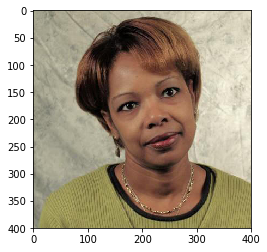

In [2]:
extractor = FaceExtractor()



img = plt.imread('./images/tilted.jpg')
plt.imshow(img)
plt.show()

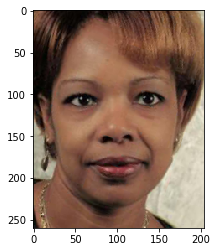

In [3]:
c = extractor.extract_faces(img)

plt.imshow(c[0])
plt.show()

In [13]:
import os
import logging
from extractor import FaceExtractor 
import matplotlib.pyplot as plt

logging.basicConfig(filename='extraction.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')


def extract_faces_from_dir(directory):
    
    extractor = FaceExtractor()
    
    if not os.path.exists('./faces'):
        os.makedirs('./faces')
        
    # dangerous!
    extracted_dir = os.path.join('./faces', directory.split('/')[-1])

    if not os.path.exists(extracted_dir):
        os.makedirs(extracted_dir)
    for parent ,__, files in os.walk(directory):
        num_faces = 0
        for file in files:
            try:
                img = plt.imread(os.path.join(parent,file))

                faces = extractor.extract_faces(img)
                
                num_faces += len(faces)
                for i, face in enumerate(faces):
                    plt.imsave(os.path.join(extracted_dir, file.split('.')[-2] + '-face-' + str(i)) + '.jpg', face)
            except Exception as e:
                logging.error("Failed extraction for file: {}, {}".format(file, e))
    logging.info("Extracted {} faces from {} directory".format(num_faces, parent))

In [14]:
extract_faces_from_dir('./sample-images')